In [ ]:
Q1
1.batch normaliztion in ANN, means normazation data of batch of data moving thourgh each neural of ANN
In hidden layer we can apply batch normalization, we are making mean as 0 & std dev as 1 which inprove are learing rate
Batch normalization improves the learning speed of neural networks and provides regularization, avoiding overfitting 123.
it give 2 trainable parameter &  2 non trainable parameter for fleaxible

In [ ]:
2.
it  optimization process more faster
it stable
it give 2 trainable parameter &  2 non trainable parameter for fleaxible


In [ ]:
3.
consider a ann,
first before takeing input to ann, we do normalization,

after z=w1*x1
we again doing normalization, but this time in batch size , then applying to activation function
this create 2 non trainable parameter.
also 2 trainable or learnable parameter will be created , a*z+b which help to give better peperformance
doing same we enter nest hiddern layer.


In [102]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns


In [103]:
data=sns.load_dataset("iris")

In [104]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [105]:
x=data.drop("species",axis=1)
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [106]:
y=data[['species']]
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [107]:
from sklearn.preprocessing import OrdinalEncoder
orn=OrdinalEncoder()
y=orn.fit_transform(y)


In [108]:
y=pd.DataFrame(y,columns=["target"])
y

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,2.0
146,2.0
147,2.0
148,2.0


In [168]:
from sklearn.model_selection import  train_test_split
x_trainfull,x_test,y_trainfull,y_test=train_test_split(x,y)

In [169]:
x_train,x_val,y_train,y_val=train_test_split(x_trainfull,y_trainfull)

In [170]:
x_train.shape,x_val.shape,x_test.shape

((84, 4), (28, 4), (38, 4))

In [171]:
from keras.src.layers.serialization import activation

layer=[tf.keras.layers.Input(shape=(4,),name="input"),#with out normalization
    tf.keras.layers.Dense(100,activation="relu",name='h1'),
       tf.keras.layers.Dense(50,activation="relu",name='h2'),
       tf.keras.layers.Dense(3,activation="softmax", name="outputLayer"),
       ]
model1=tf.keras.models.Sequential(layer)

In [173]:
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),metrics=["accuracy"])

In [174]:
his=model1.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
3/3 [==============================] - 1s 94ms/step - loss: 5.1391 - accuracy: 0.3929 - val_loss: 0.9716 - val_accuracy: 0.3571
Epoch 2/20
3/3 [==============================] - 0s 16ms/step - loss: 1.0182 - accuracy: 0.2976 - val_loss: 0.8617 - val_accuracy: 0.5357
Epoch 3/20
3/3 [==============================] - 0s 15ms/step - loss: 0.7680 - accuracy: 0.6786 - val_loss: 0.5048 - val_accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 0s 15ms/step - loss: 0.4924 - accuracy: 0.8810 - val_loss: 0.1699 - val_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 0s 16ms/step - loss: 0.2481 - accuracy: 0.8929 - val_loss: 0.1667 - val_accuracy: 0.8571
Epoch 6/20
3/3 [==============================] - 0s 16ms/step - loss: 0.1823 - accuracy: 0.8929 - val_loss: 0.0475 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 0s 15ms/step - loss: 0.2003 - accuracy: 0.9286 - val_loss: 0.1994 - val_accuracy: 0.9286
Epoch 8/20
3/3 [===========

In [175]:
model1.evaluate(x_test,y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.2056 - accuracy: 0.9211


[0.2055942565202713, 0.9210526347160339]

<Axes: >

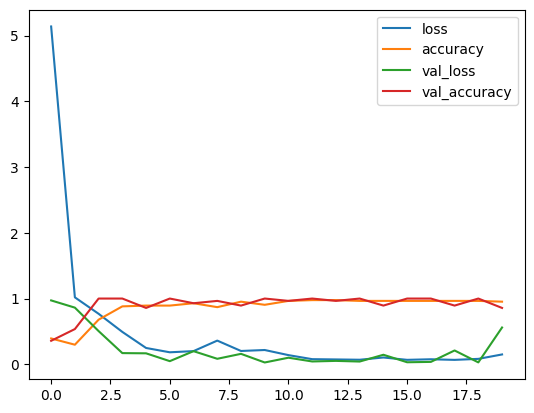

In [176]:
pd.DataFrame(his.history).plot()

In [177]:
layer=[tf.keras.layers.Input(shape=(4,),name="input"),
       tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation="relu",name='h1'),,#with normalization
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dense(50,activation="relu",name='h2'),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dense(3,activation="softmax", name="outputLayer"),
       ]
model2=tf.keras.models.Sequential(layer)
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),metrics=["accuracy"])


In [181]:
his1=model2.fit(x_train,y_train,epochs=10,batch_size=10,validation_data=(x_val,y_val))

Epoch 1/10
9/9 [==============================] - 0s 13ms/step - loss: 0.4503 - accuracy: 0.9286 - val_loss: 26.2747 - val_accuracy: 0.7500
Epoch 2/10
9/9 [==============================] - 0s 6ms/step - loss: 2.4705 - accuracy: 0.7024 - val_loss: 14.7971 - val_accuracy: 0.7500
Epoch 3/10
9/9 [==============================] - 0s 8ms/step - loss: 0.7571 - accuracy: 0.8452 - val_loss: 7.1298 - val_accuracy: 0.4643
Epoch 4/10
9/9 [==============================] - 0s 6ms/step - loss: 0.3523 - accuracy: 0.8571 - val_loss: 12.0468 - val_accuracy: 0.7500
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 0.3412 - accuracy: 0.9048 - val_loss: 7.9345 - val_accuracy: 0.7500
Epoch 6/10
9/9 [==============================] - 0s 6ms/step - loss: 0.4738 - accuracy: 0.8333 - val_loss: 3.9363 - val_accuracy: 0.7500
Epoch 7/10
9/9 [==============================] - 0s 6ms/step - loss: 0.2801 - accuracy: 0.8810 - val_loss: 2.8226 - val_accuracy: 0.7500
Epoch 8/10
9/9 [==============

In [ ]:
#trainling will fast

<Axes: >

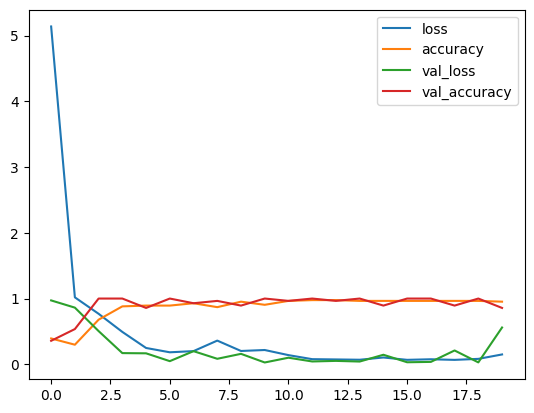

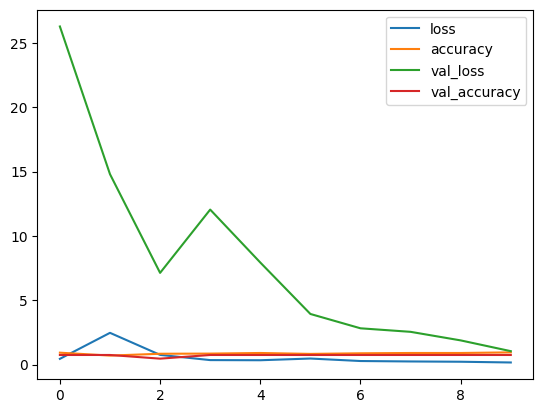

In [182]:
pd.DataFrame(his.history).plot()
pd.DataFrame(his1.history).plot()

In [185]:
# q3.
1.
layer=[tf.keras.layers.Input(shape=(4,),name="input"),
       tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation="relu",name='h1'),#with normalization
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dense(50,activation="relu",name='h2'),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dense(3,activation="softmax", name="outputLayer"),
       ]
model2=tf.keras.models.Sequential(layer)
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),metrics=["accuracy"])
his1=model2.fit(x_train,y_train,epochs=10,batch_size=10,validation_data=(x_val,y_val))#batch_size=10

Epoch 1/10
9/9 [==============================] - 2s 32ms/step - loss: 1.5533 - accuracy: 0.6310 - val_loss: 12.2493 - val_accuracy: 0.7500
Epoch 2/10
9/9 [==============================] - 0s 5ms/step - loss: 0.2671 - accuracy: 0.9048 - val_loss: 6.7853 - val_accuracy: 0.7500
Epoch 3/10
9/9 [==============================] - 0s 6ms/step - loss: 0.5633 - accuracy: 0.8214 - val_loss: 6.7486 - val_accuracy: 0.7500
Epoch 4/10
9/9 [==============================] - 0s 9ms/step - loss: 0.7074 - accuracy: 0.7381 - val_loss: 5.0932 - val_accuracy: 0.7500
Epoch 5/10
9/9 [==============================] - 0s 8ms/step - loss: 0.9731 - accuracy: 0.7500 - val_loss: 9.0990 - val_accuracy: 0.7143
Epoch 6/10
9/9 [==============================] - 0s 6ms/step - loss: 0.7025 - accuracy: 0.6905 - val_loss: 6.2651 - val_accuracy: 0.7500
Epoch 7/10
9/9 [==============================] - 0s 6ms/step - loss: 0.2329 - accuracy: 0.9048 - val_loss: 3.8958 - val_accuracy: 0.7500
Epoch 8/10
9/9 [================

In [186]:
layer=[tf.keras.layers.Input(shape=(4,),name="input"),
       tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation="relu",name='h1'),#with normalization
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dense(50,activation="relu",name='h2'),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dense(3,activation="softmax", name="outputLayer"),
       ]
model2=tf.keras.models.Sequential(layer)
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),metrics=["accuracy"])
his1=model2.fit(x_train,y_train,epochs=10,batch_size=50,validation_data=(x_val,y_val))#batch_size=50

Epoch 1/10
2/2 [==============================] - 2s 228ms/step - loss: 1.2838 - accuracy: 0.5238 - val_loss: 12.8713 - val_accuracy: 0.3214
Epoch 2/10
2/2 [==============================] - 0s 37ms/step - loss: 0.1722 - accuracy: 0.9048 - val_loss: 20.5703 - val_accuracy: 0.3214
Epoch 3/10
2/2 [==============================] - 0s 28ms/step - loss: 0.0905 - accuracy: 0.9762 - val_loss: 27.5999 - val_accuracy: 0.5357
Epoch 4/10
2/2 [==============================] - 0s 30ms/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 34.1071 - val_accuracy: 0.7500
Epoch 5/10
2/2 [==============================] - 0s 30ms/step - loss: 0.0311 - accuracy: 0.9762 - val_loss: 39.8024 - val_accuracy: 0.7500
Epoch 6/10
2/2 [==============================] - 0s 31ms/step - loss: 0.0328 - accuracy: 0.9762 - val_loss: 41.6955 - val_accuracy: 0.7500
Epoch 7/10
2/2 [==============================] - 0s 49ms/step - loss: 0.0144 - accuracy: 0.9881 - val_loss: 41.5261 - val_accuracy: 0.7500
Epoch 8/10
2/2 [===

In [ ]:
2.
Batch normalization is a technique for training deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks1. The following are some of the advantages of batch normalization:

Faster convergence: Batch normalization reduces the internal covariate shift, which leads to faster convergence of the network1.
Regularization: Batch normalization acts as a regularizer, reducing overfitting and improving generalization performance1.
Robustness: Batch normalization makes the network more robust to changes in hyperparameters such as learning rate and weight initialization1.
However, there are also some potential limitations of batch normalization:

Batch size dependency: Batch normalization is dependent on the batch size used during training. Small batch sizes can lead to inaccurate estimates of mean and variance, which can negatively impact performance2.
Computational overhead: Batch normalization requires additional computations during training, which can increase training time2.
Not suitable for all architectures: Batch normalization may not be suitable for all architectures, such as recurrent neural networks (RNNs), due to their temporal nature3.
Overall, batch normalization is a powerful technique that can improve the training of deep neural networks by stabilizing the learning process, reducing overfitting, and improving generalization performance. However, it is important to be aware of its potential limitations when applying it to different architectures and datasets.


In [ ]:
import goo